# Geospatial visualizations

In [2]:
# Load libraries
import fiona
import cartopy
import numpy as np
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.crs import PlateCarree
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from cartopy.feature import NaturalEarthFeature

In [3]:
# Load data
df = pd.read_csv('../data/2003/clean_labeled_zero_2003.csv')

In [4]:
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")

## OD visualizations

In [5]:
df_od = df_geo.loc[(df_geo['Type'] != 0) & (df_geo['time'].isin(["2003-08-14", "2003-08-15", "2003-08-16"]))]

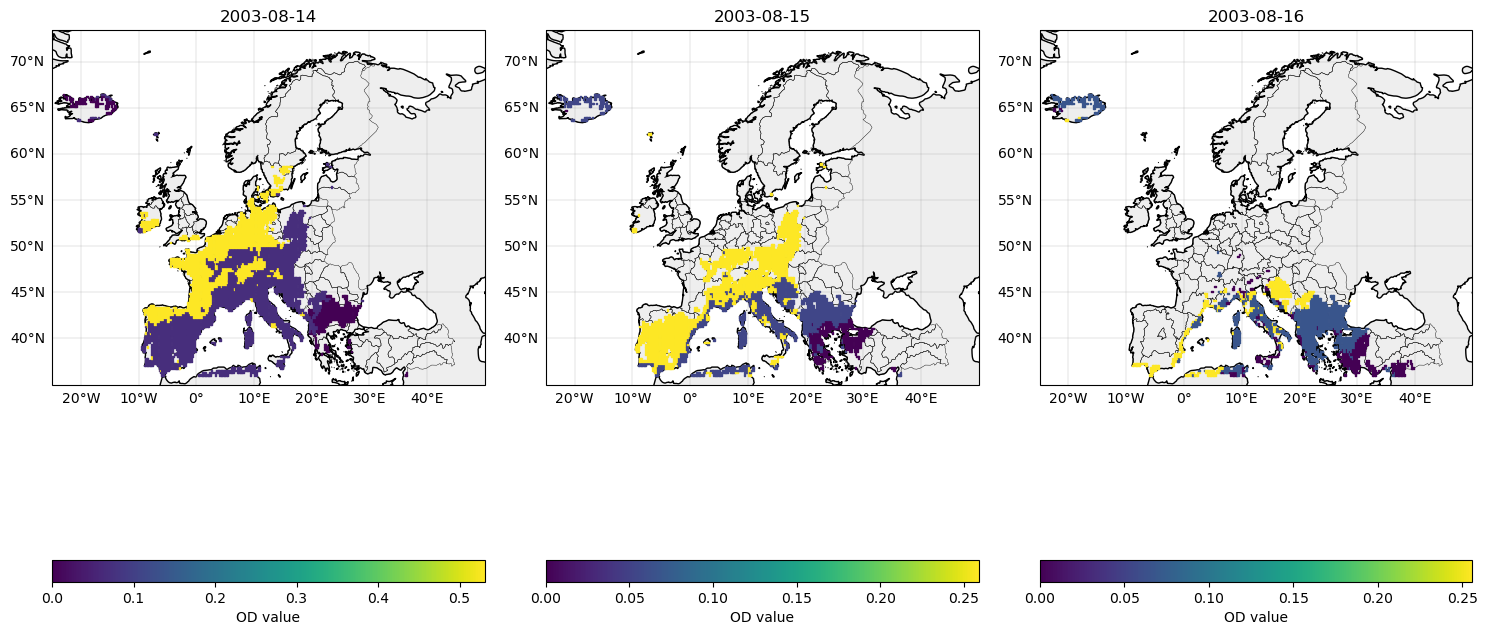

In [6]:
# Assuming you have a GeoDataFrame 'gdf' and a DataFrame 'data' with a 'time' column
categories = df_od['time'].unique()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 12), subplot_kw={'projection': PlateCarree()})

# Read the NUTS shapefile once
path_in_nuts = "./data/NUTS_RG_20M_2021_4326.shp"
nuts_src = fiona.open(path_in_nuts)
gdf = gpd.GeoDataFrame.from_features([feature for feature in nuts_src], crs=PlateCarree())
gdf_nuts = gdf[gdf["LEVL_CODE"]==1] # NUTS 1
land_50m = NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor="#EEEEEE")

for i, category in enumerate(categories):

    # Access current axis from the subplot grid
    ax = axs[i]

    # Filter your data based on the current category
    data_filtered = df_od[df_od['time'] == category]

    # Set extent and add basemap features
    ax.set_extent([-25, 50, 35, 70])
    ax.add_feature(land_50m)
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5, linestyle='-')
    gl.top_labels = False
    gl.right_labels = False

    # Plot NUTS and filtered data on the current axis
    gdf_nuts.plot(ax=ax, facecolor='None', linewidth=0.3, zorder=10)
    data_filtered.plot(ax=ax, column="OD", marker="s", markersize=1, zorder=20, legend=True, legend_kwds={"label": "OD value", "orientation": "horizontal"})
    
    # Set title for each subplot
    ax.set_title(category)

plt.tight_layout()
plt.savefig('images/OD_aug.png', bbox_inches ="tight")
plt.show()

## ID visualizations

In [7]:
df_id = df_geo.loc[(df_geo['Type'] != 0) & (df_geo['time'].isin(["2003-08-14", "2003-08-15", "2003-08-16"]))]

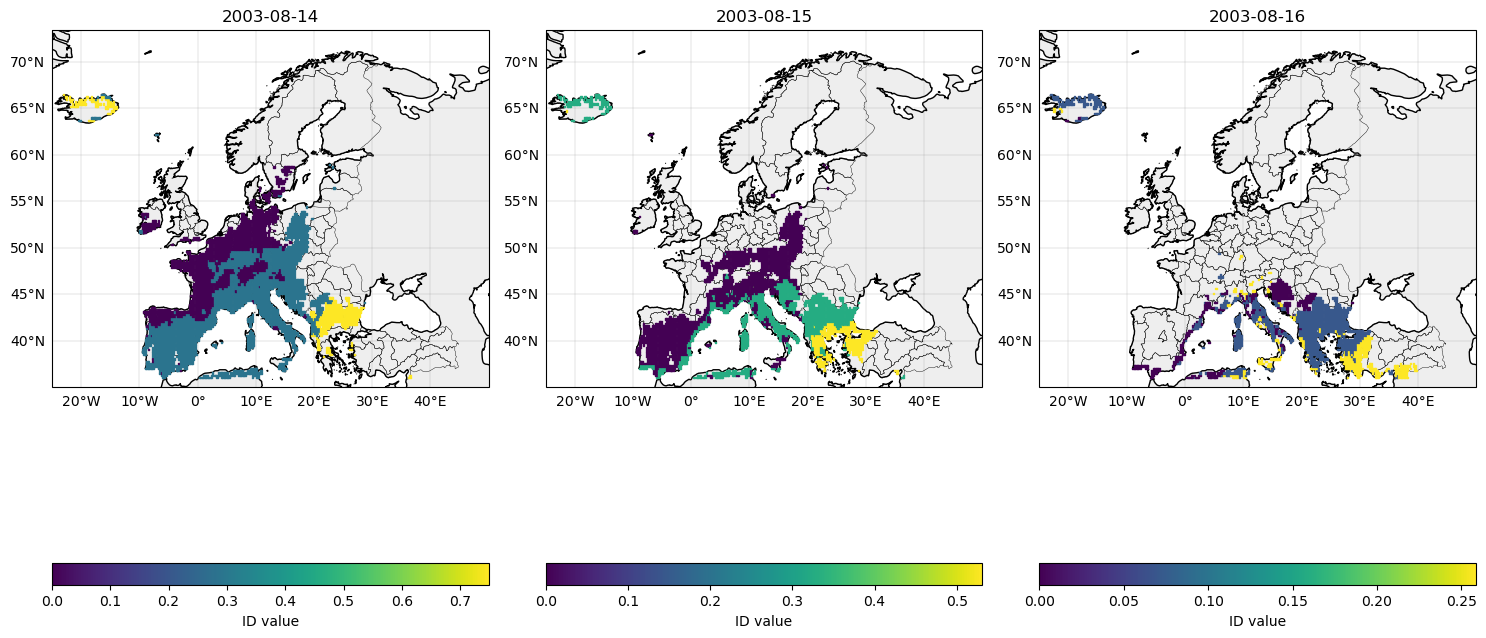

In [8]:
# Assuming you have a GeoDataFrame 'gdf' and a DataFrame 'data' with a 'time' column
categories = df_id['time'].unique()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 12), subplot_kw={'projection': PlateCarree()})

# Read the NUTS shapefile once
path_in_nuts = "./data/NUTS_RG_20M_2021_4326.shp"
nuts_src = fiona.open(path_in_nuts)
gdf = gpd.GeoDataFrame.from_features([feature for feature in nuts_src], crs=PlateCarree())
gdf_nuts = gdf[gdf["LEVL_CODE"]==1] # NUTS 1
land_50m = NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor="#EEEEEE")

for i, category in enumerate(categories):

    # Access current axis from the subplot grid
    ax = axs[i]

    # Filter your data based on the current category
    data_filtered = df_id[df_id['time'] == category]

    # Set extent and add basemap features
    ax.set_extent([-25, 50, 35, 70])
    ax.add_feature(land_50m)
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5, linestyle='-')
    gl.top_labels = False
    gl.right_labels = False

    # Plot NUTS and filtered data on the current axis
    gdf_nuts.plot(ax=ax, facecolor='None', linewidth=0.3, zorder=10)
    data_filtered.plot(ax=ax, column="ID", marker="s", markersize=1, zorder=20, legend=True, legend_kwds={"label": "ID value", "orientation": "horizontal"})
    
    # Set title for each subplot
    ax.set_title(category)

plt.tight_layout()
plt.savefig('images/ID_aug.png', bbox_inches ="tight")
plt.show()

## Source & sink visualizations yearly

In [9]:
# Group by 'lat' and 'lon', then count the occurrences of each 'type'
grouped_df = df.groupby(['lat', 'lon'])['Type'].value_counts().unstack(fill_value=0).reset_index()

grouped_df = grouped_df.drop([0, 2], axis=1)

new_column_names = ['lat', 'lon', 'source', 'sink']
grouped_df.columns = new_column_names

grouped_df['ratio'] = grouped_df['source'] / grouped_df['sink']
grouped_df = grouped_df.replace([np.inf, -np.inf], 1)
grouped_df = grouped_df.fillna(0)

grouped_df['Type'] = np.where(grouped_df['source'] > grouped_df['sink'], 0, np.where(grouped_df['source'] == grouped_df['sink'], 1, 2))

print(grouped_df)

        lat        lon  source  sink  ratio  Type
0      35.8 -26.000000       0     0    0.0     1
1      35.8 -25.749063       0     0    0.0     1
2      35.8 -25.498127       0     0    0.0     1
3      35.8 -25.247190       0     0    0.0     1
4      35.8 -24.996254       0     0    0.0     1
...     ...        ...     ...   ...    ...   ...
37783  71.0  39.996254       0     0    0.0     1
37784  71.0  40.247192       0     0    0.0     1
37785  71.0  40.498127       0     0    0.0     1
37786  71.0  40.749065       0     0    0.0     1
37787  71.0  41.000000       0     0    0.0     1

[37788 rows x 6 columns]


In [10]:
grouped_geo = gpd.GeoDataFrame(grouped_df, geometry=gpd.points_from_xy(grouped_df.lon, grouped_df.lat), crs="EPSG:4326")

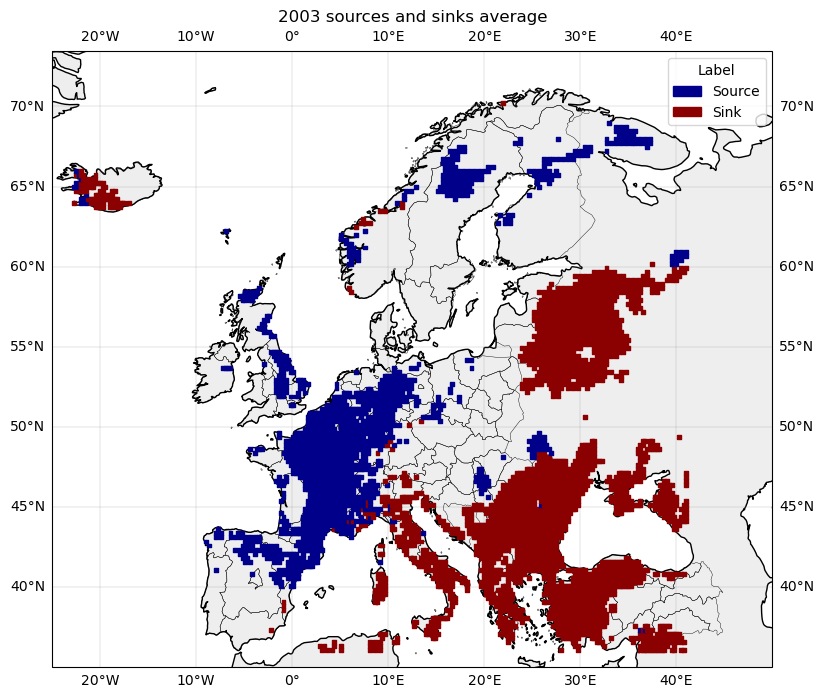

In [11]:
# Create custom legend handles
colors = ['darkblue', 'darkred']
custom_labels = ['Source', 'Sink']
patches = [Patch(color=color, label=label) for color, label in zip(colors, custom_labels)]

# Create a custom colormap
cmap = ListedColormap(colors)

path_in_nuts = "./data/NUTS_RG_20M_2021_4326.shp"
nuts_src = fiona.open(path_in_nuts)
gdf = gpd.GeoDataFrame.from_features([feature for feature in nuts_src], crs=ccrs.PlateCarree())

# Now we filter so we get all the features with lEVL_CODE=1 corresponding to NUTS 1
gdf_nuts = gdf[gdf["LEVL_CODE"]==1]

fig, ax = plt.subplots(1, 1, figsize=(12, 8), subplot_kw={"projection": ccrs.PlateCarree()})
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor="#EEEEEE")
ax.set_extent([-25, 50, 35, 70])
ax.add_feature(land_50m)
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.3, color='gray', alpha=0.5, linestyle='-')

gdf_nuts.plot(ax=ax, facecolor='None', linewidth=0.3, zorder=10)

grouped_geo[grouped_geo["Type"] != 1].plot(ax=ax, column="Type", marker="s", markersize=8, zorder=20, cmap=cmap)
ax.legend(handles=patches, title="Label")
plt.title("2003 sources and sinks average")

plt.savefig('images/figure11.png', bbox_inches ="tight")
plt.show()

## Source and sink visualization monthly

In [12]:
df_split = np.array_split(df, 3)

# Assign the three parts
df1, df2, df3 = df_split

df1 = df1[df1["time"] != "2003-07-01"]
df2 = df2[df2["time"] != "2003-08-01"]

/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
# Group by 'lat' and 'lon', then count the occurrences of each 'type'
grouped_df1 = df1.groupby(['lat', 'lon'])['Type'].value_counts().unstack(fill_value=0).reset_index()

grouped_df1 = grouped_df1.drop([0, 2], axis=1)

new_column_names = ['lat', 'lon', 'source', 'sink']
grouped_df1.columns = new_column_names

grouped_df1['ratio'] = grouped_df1['source'] / grouped_df1['sink']
grouped_df1 = grouped_df1.replace([np.inf, -np.inf], 1)
grouped_df1 = grouped_df1.fillna(0)

grouped_df1['Type'] = np.where(grouped_df1['source'] > grouped_df1['sink'], 0, np.where(grouped_df1['source'] == grouped_df1['sink'], 1, 2))

grouped_df1['month'] = "June 2003"

print(grouped_df1)

        lat        lon  source  sink  ratio  Type      month
0      35.8 -26.000000       0     0    0.0     1  June 2003
1      35.8 -25.749063       0     0    0.0     1  June 2003
2      35.8 -25.498127       0     0    0.0     1  June 2003
3      35.8 -25.247190       0     0    0.0     1  June 2003
4      35.8 -24.996254       0     0    0.0     1  June 2003
...     ...        ...     ...   ...    ...   ...        ...
37783  71.0  39.996254       0     0    0.0     1  June 2003
37784  71.0  40.247192       0     0    0.0     1  June 2003
37785  71.0  40.498127       0     0    0.0     1  June 2003
37786  71.0  40.749065       0     0    0.0     1  June 2003
37787  71.0  41.000000       0     0    0.0     1  June 2003

[37788 rows x 7 columns]


In [14]:
# Group by 'lat' and 'lon', then count the occurrences of each 'type'
grouped_df2 = df2.groupby(['lat', 'lon'])['Type'].value_counts().unstack(fill_value=0).reset_index()

grouped_df2 = grouped_df2.drop([0, 2], axis=1)

new_column_names = ['lat', 'lon', 'source', 'sink']
grouped_df2.columns = new_column_names

grouped_df2['ratio'] = grouped_df2['source'] / grouped_df2['sink']
grouped_df2 = grouped_df2.replace([np.inf, -np.inf], 1)
grouped_df2 = grouped_df2.fillna(0)

grouped_df2['Type'] = np.where(grouped_df2['source'] > grouped_df2['sink'], 0, np.where(grouped_df2['source'] == grouped_df2['sink'], 1, 2))

grouped_df2['month'] = "July 2003"

print(grouped_df2)

        lat        lon  source  sink  ratio  Type      month
0      35.8 -26.000000       0     0    0.0     1  July 2003
1      35.8 -25.749063       0     0    0.0     1  July 2003
2      35.8 -25.498127       0     0    0.0     1  July 2003
3      35.8 -25.247190       0     0    0.0     1  July 2003
4      35.8 -24.996254       0     0    0.0     1  July 2003
...     ...        ...     ...   ...    ...   ...        ...
37783  71.0  39.996254       0     0    0.0     1  July 2003
37784  71.0  40.247192       0     0    0.0     1  July 2003
37785  71.0  40.498127       0     0    0.0     1  July 2003
37786  71.0  40.749065       0     0    0.0     1  July 2003
37787  71.0  41.000000       0     0    0.0     1  July 2003

[37788 rows x 7 columns]


In [15]:
# Group by 'lat' and 'lon', then count the occurrences of each 'type'
grouped_df3 = df3.groupby(['lat', 'lon'])['Type'].value_counts().unstack(fill_value=0).reset_index()

grouped_df3 = grouped_df3.drop([0, 2], axis=1)

new_column_names = ['lat', 'lon', 'source', 'sink']
grouped_df3.columns = new_column_names

grouped_df3['ratio'] = grouped_df3['source'] / grouped_df3['sink']
grouped_df3 = grouped_df3.replace([np.inf, -np.inf], 1)
grouped_df3 = grouped_df3.fillna(0)

grouped_df3['Type'] = np.where(grouped_df3['source'] > grouped_df3['sink'], 0, np.where(grouped_df3['source'] == grouped_df3['sink'], 1, 2))

grouped_df3['month'] = "August 2003"

print(grouped_df3)

        lat        lon  source  sink  ratio  Type        month
0      35.8 -26.000000       0     0    0.0     1  August 2003
1      35.8 -25.749063       0     0    0.0     1  August 2003
2      35.8 -25.498127       0     0    0.0     1  August 2003
3      35.8 -25.247190       0     0    0.0     1  August 2003
4      35.8 -24.996254       0     0    0.0     1  August 2003
...     ...        ...     ...   ...    ...   ...          ...
37783  71.0  39.996254       0     0    0.0     1  August 2003
37784  71.0  40.247192       0     0    0.0     1  August 2003
37785  71.0  40.498127       0     0    0.0     1  August 2003
37786  71.0  40.749065       0     0    0.0     1  August 2003
37787  71.0  41.000000       0     0    0.0     1  August 2003

[37788 rows x 7 columns]


In [16]:
grouped_df = pd.concat([grouped_df1, grouped_df2, grouped_df3])
grouped_df

lat        lon  source  sink  ratio  Type        month
0      35.8 -26.000000       0     0    0.0     1    June 2003
1      35.8 -25.749063       0     0    0.0     1    June 2003
2      35.8 -25.498127       0     0    0.0     1    June 2003
3      35.8 -25.247190       0     0    0.0     1    June 2003
4      35.8 -24.996254       0     0    0.0     1    June 2003
...     ...        ...     ...   ...    ...   ...          ...
37783  71.0  39.996254       0     0    0.0     1  August 2003
37784  71.0  40.247192       0     0    0.0     1  August 2003
37785  71.0  40.498127       0     0    0.0     1  August 2003
37786  71.0  40.749065       0     0    0.0     1  August 2003
37787  71.0  41.000000       0     0    0.0     1  August 2003

[113364 rows x 7 columns]

In [17]:
df_geo = gpd.GeoDataFrame(grouped_df, geometry=gpd.points_from_xy(grouped_df.lon, grouped_df.lat), crs="EPSG:4326")

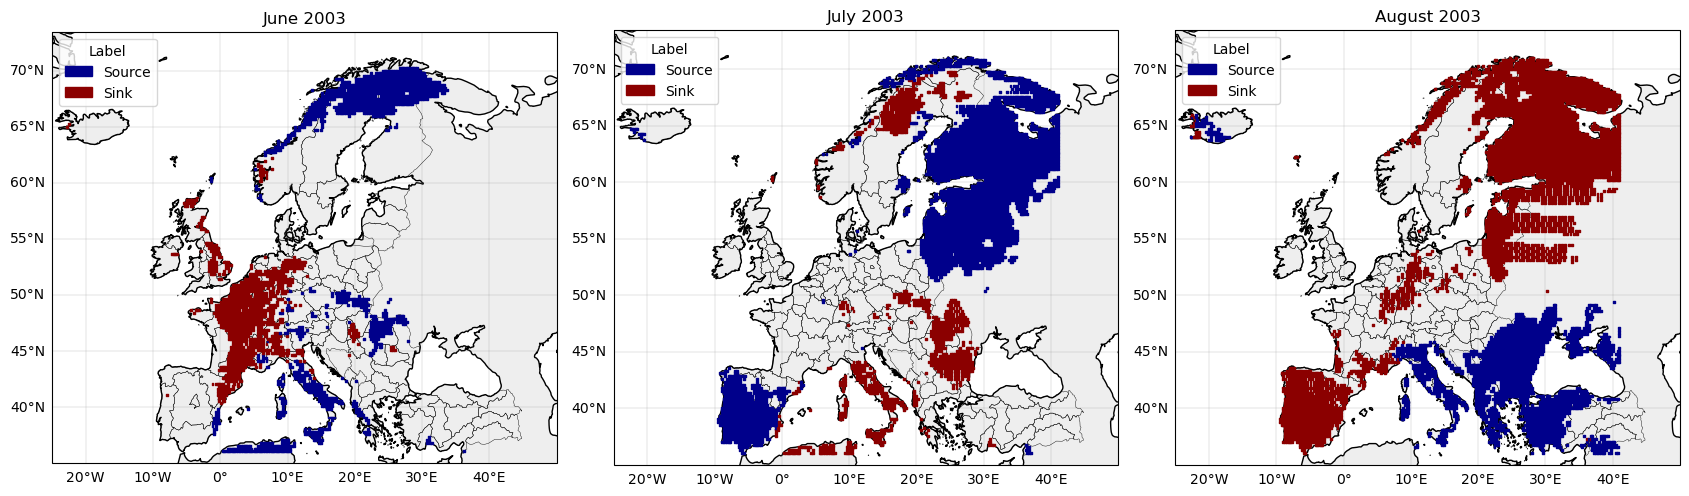

In [18]:
# Assuming you have a GeoDataFrame 'gdf' and a DataFrame 'data' with a 'time' column
categories = df_geo['month'].unique()

# Create custom legend handles
colors = ['darkblue', 'darkred']
custom_labels = ['Source', 'Sink']
patches = [Patch(color=color, label=label) for color, label in zip(colors, custom_labels)]

# Create a custom colormap
cmap = ListedColormap(colors)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17, 14), subplot_kw={'projection': PlateCarree()})

# Read the NUTS shapefile once
path_in_nuts = "./data/NUTS_RG_20M_2021_4326.shp"
nuts_src = fiona.open(path_in_nuts)
gdf = gpd.GeoDataFrame.from_features([feature for feature in nuts_src], crs=PlateCarree())
gdf_nuts = gdf[gdf["LEVL_CODE"]==1] # NUTS 1
land_50m = NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor="#EEEEEE")

for i, category in enumerate(categories):

    # Access current axis from the subplot grid
    ax = axs[i]

    # Filter your data based on the current category
    data_filtered = df_geo[(df_geo['month'] == category) & (df_geo["Type"] != 1)]

    # Set extent and add basemap features
    ax.set_extent([-25, 50, 35, 70])
    ax.add_feature(land_50m)
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5, linestyle='-')
    gl.top_labels = False
    gl.right_labels = False

    # Plot NUTS and filtered data on the current axis
    gdf_nuts.plot(ax=ax, facecolor='None', linewidth=0.3, zorder=10)
    data_filtered.plot(ax=ax, column="ratio", marker="s", markersize=2, zorder=20, cmap=cmap)

    ax.legend(handles=patches, title="Label", loc='upper left')
    
    # Set title for each subplot
    ax.set_title(category)

plt.tight_layout()
plt.savefig('images/figure12.png', bbox_inches ="tight")
plt.show()